In [64]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

In [65]:
movies = pd.read_csv('./ml-latest-small/movies.csv', index_col=None, na_values=['NA'])

In [66]:
movies.shape

(9742, 3)

In [67]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
movies['movieId'].max()

193609

In [69]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', index_col=None, na_values=['NA'])

In [70]:
ratings.shape

(100836, 4)

In [71]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [72]:
tags = pd.read_csv('./ml-latest-small/tags.csv', index_col=None, na_values=['NA'])

In [73]:
tags.shape

(3683, 4)

In [74]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [75]:
links = pd.read_csv('./ml-latest-small/links.csv', index_col=None, na_values=['NA'])

In [76]:
links.shape

(9742, 3)

In [77]:
links.sample(10)

,movieId,imdbId,tmdbId
676,892,117991,44705.0
657,851,115632,549.0
8114,100882,2017561,170657.0
5020,7792,71970,17365.0
4968,7573,86006,36670.0
6293,47997,387808,7512.0
820,1080,79470,583.0
671,885,115725,3587.0
195,229,109579,10531.0
2361,3129,158371,9684.0


In [78]:
mvrt = pd.merge(ratings, movies, on='movieId')

In [79]:
mvrt.shape

(100836, 6)

In [132]:
mvrt.sample(20)

,userId,movieId,rating,timestamp,title,genres,year_released
84668,414,89470,4.0,1328313102,Contagion,Sci-Fi|Thriller|IMAX,2011
42073,51,56367,5.0,1230932765,Juno,Comedy|Drama|Romance,2007
94550,464,50798,1.5,1286829789,Epic Movie,Adventure|Comedy,2007
71644,33,1678,5.0,939715414,"Joy Luck Club, The",Drama|Romance,1993
55296,18,53129,3.0,1521323641,Mr. Brooks,Crime|Drama|Thriller,2007
82038,198,4023,5.0,1034195998,"Family Man, The",Comedy|Drama|Romance,2000
25392,162,150,4.0,836488864,Apollo 13,Adventure|Drama|IMAX,1995
66637,216,3868,2.0,975212571,"Naked Gun: From the Files of Police Squad!, The",Action|Comedy|Crime|Romance,1988
19367,168,265,4.5,1306793369,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,1992
96281,298,74916,2.5,1447517917,Greenberg,Comedy|Drama,2010


In [81]:
all_genres = movies['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [82]:
rows_with_no_genre = mvrt[mvrt['genres'] == '(no genres listed)']

In [50]:
rows_with_no_genre.movieId.value_counts()

movieId
122896    7
141866    3
142456    2
152037    2
166024    2
171495    2
172591    2
147250    1
171749    1
132084    1
181719    1
141131    1
156605    1
122888    1
174403    1
165489    1
182727    1
149330    1
143410    1
129250    1
167570    1
176601    1
172497    1
114335    1
169034    1
159779    1
181413    1
155589    1
171891    1
171631    1
159161    1
134861    1
173535    1
161008    1
Name: count, dtype: int64

In [83]:
mvrt = mvrt[~mvrt['movieId'].isin(rows_with_no_genre['movieId'])]

In [93]:
mvrt.shape

(100789, 6)

In [85]:
all_genres = mvrt['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama          41928
Comedy         39053
Action         30635
Thriller       26452
Adventure      24161
Romance        18124
Sci-Fi         17243
Crime          16681
Fantasy        11834
Children        9208
Mystery         7674
Horror          7291
Animation       6988
War             4859
IMAX            4145
Musical         4138
Western         1930
Documentary     1219
Film-Noir        870
Name: count, dtype: int64


In [87]:
mvrt.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

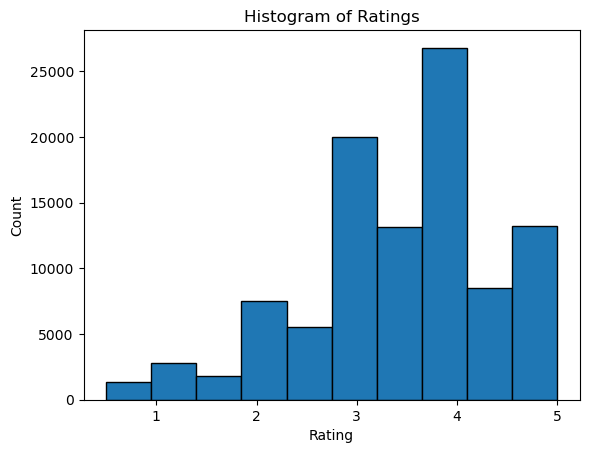

In [88]:
plt.hist(mvrt['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

In [114]:
genres_list = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
               'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror',
               'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir']

In [112]:
def average_rating_by_genre(data, genre_list):
    genres_expanded = data['genres'].str.get_dummies(sep='|')

    # Step 2: Concatenate 'genres_expanded' with 'data'
    data_genres = pd.concat([data, genres_expanded], axis=1)

    # Step 3: Calculate average rating for each genre
    average_ratings = {}
    for genre in genre_list:
        if genre in data_genres.columns:
            average_rating = data_genres[data_genres[genre] == 1]['rating'].mean()
            average_ratings[genre] = average_rating

    return average_ratings

In [116]:
result = average_rating_by_genre(mvrt,genres_list)

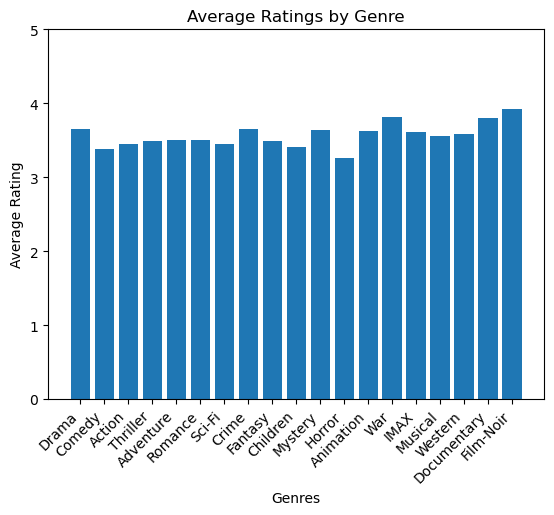

In [121]:
plt.bar(result.keys(), result.values())
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.ylim(0, 5)  # Set the y-axis limit to 5
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [129]:
mvrt['year_released'] = mvrt['title'].str.extract(r'\((\d{4})\)', expand=False)
mvrt['title'] = mvrt['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

In [130]:
mvrt.head()

,userId,movieId,rating,timestamp,title,genres,year_released
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [143]:
mvrt.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
year_released    0
dtype: int64

In [141]:
mvrt_movies_with_no_year = mvrt[mvrt['year_released'].isnull()]

In [142]:
mvrt_movies_with_no_year

,userId,movieId,rating,timestamp,title,genres,year_released


In [140]:
mvrt.loc[mvrt['title'] == 'Ready Player One', 'year_released'] = 2018
mvrt.loc[mvrt['title'] == 'Babylon 5', 'year_released'] = 1994
mvrt.loc[mvrt['title'] == 'Nocturnal Animals', 'year_released'] = 2016
mvrt.loc[mvrt['title'] == 'Moonlight', 'year_released'] = 2016

In [151]:
mvrt_movies_with_no_year1 = mvrt[pd.isna(mvrt['year_released'])]
mvrt_movies_with_no_year1.shape

(0, 7)

In [157]:
mvrt.dtypes

userId             int64
movieId            int64
rating           float64
timestamp          int64
title             object
genres            object
year_released      int64
dtype: object

In [156]:
mvrt['year_released'] = pd.to_numeric(mvrt['year_released'], errors='coerce')

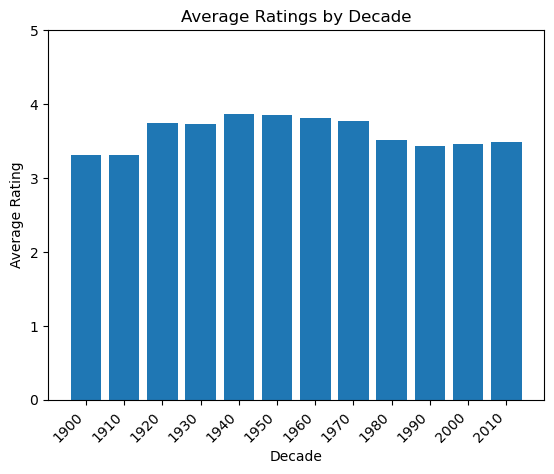

In [160]:
mvrt['decade'] = (mvrt['year_released'] // 10) * 10
average_ratings_by_decade = mvrt.groupby('decade')['rating'].mean()
plt.bar(average_ratings_by_decade.index.astype(str), average_ratings_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set the y-axis limit to 5
plt.title('Average Ratings by Decade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [162]:
mvrt.head()

,userId,movieId,rating,title,genres,year_released,decade
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990


In [161]:
mvrt = mvrt.drop('timestamp', axis=1)